In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Create dataset

An linear function with added noise is applied to a uniformly created set of values (X).

In [3]:
def create_dataset(m, x_min = 0.0, x_max = 10.0, a = 1.2):
    X = np.sort(np.random.uniform(x_min, x_max, m))
    Y = X*a
    Y += np.random.normal(0, 2.5, m)
    return X, Y

Text(0, 0.5, 'y')

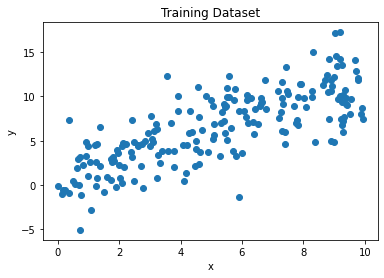

In [4]:
X, Y = create_dataset(m=200)
plt.plot(X, Y, 'o')
plt.title('Training Dataset')
plt.xlabel('x')
plt.ylabel('y')

### Hypothesis

A 1 parameter (no bias) linear function as hypothesis:

$$h_{\theta}(x) = \theta \cdot x$$

In [5]:
class H:
    def __init__(self, theta=0.0):
        self.theta = theta
    def __call__(self, x):
        return self.theta*x

In [6]:
h = H()

### Cost Function

Mean squared error:

$$J(\theta)=\frac{1}{2m}\sum_{i=0}^{m-1}{(h_{\theta}(x^{(i)})-y^{(i)})^2}$$

In [7]:
def MSE(h, X, Y):
    m = X.shape[0]
    return (1/(2*m))*np.sum((h(X)-Y)**2)

### Costs

$\theta=4.0$

cost = 141.93561886044122


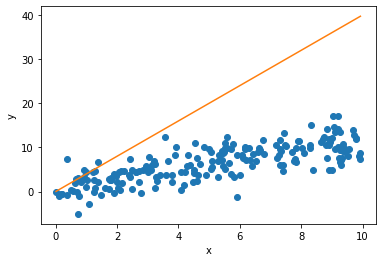

In [8]:
h.theta = 4.0
Y_ = h(X)
plt.plot(X, Y, 'o')
plt.plot(X, Y_)
plt.xlabel('x')
plt.ylabel('y')
J = MSE(h, X, Y)
print(f'cost = {J}')

$\theta=1.0$

cost = 4.402182347643293


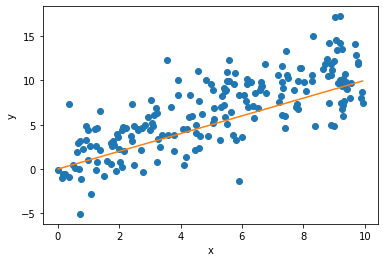

In [9]:
h.theta = 1.0
Y_ = h(X)
plt.plot(X, Y, 'o')
plt.plot(X, Y_)
plt.xlabel('x')
plt.ylabel('y')
J = MSE(h, X, Y)
print(f'cost = {J}')

### Sweeping costs

Values to test with $\theta$

In [10]:
thetas = np.arange(0.0, 2.2, 0.2)
print(thetas)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


Cost for each tested theta

In [11]:
costs = []
for theta in thetas:
    h.theta = theta
    costs.append(MSE(h, X, Y))

In [12]:
print(costs)

[29.61921834771415, 21.733350554193176, 15.2687130574256, 10.225305857411426, 6.603128954150658, 4.402182347643293, 3.622466037889332, 4.263980024888774, 6.326724308641619, 9.810698889147869, 14.71590376640752]


Cost vs theta

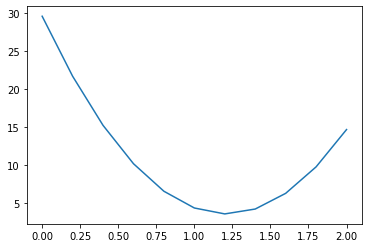

In [13]:
plt.plot(thetas, costs)

$\theta$ value that produces the minimum cost

In [14]:
best_theta = thetas[np.argmin(costs)]
print(f'Best theta = {best_theta}')

Best theta = 1.2000000000000002


Predicting with the selected theta

In [15]:
h.theta = best_theta
Y_ = h(X)

Dataset and predicted data

cost = 3.622466037889332


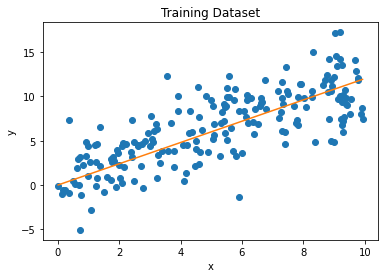

In [16]:
plt.plot(X, Y, 'o')
plt.plot(X, Y_)
plt.title('Training Dataset')
plt.xlabel('x')
plt.ylabel('y')
J = MSE(h, X, Y)
print(f'cost = {J}')